In [ ]:
#Predict the price of houses taking the input as Sq.Ft. and 
#determine the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
#Predict the price of the house if the square feet of the house is 995.

In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
#read file
house_sell = pd.read_csv('House Selling Price.csv')  
house_sell.head()

,PRICE ($),SQFT
0,650000.0,1001.0
1,380000.0,735.0
2,602500.0,790.0
3,180000.0,413.0
4,320000.0,718.0


In [ ]:
#keep a copy
house_sell_reg = house_sell.copy()

In [ ]:
#shape
house_sell_reg.shape

(578, 2)

In [ ]:
#column names
house_sell_reg.columns

Index(['PRICE ($)', 'SQFT'], dtype='object')

In [ ]:
#rename columns
house_sell_reg = house_sell_reg.rename(columns = {'PRICE ($)':'price'})
house_sell_reg.tail()

,price,SQFT
573,580000.0,931.0
574,NaN,NaN
575,NaN,NaN
576,NaN,NaN
577,NaN,NaN


In [ ]:
#dropna
house_sell_reg = house_sell_reg.dropna()
house_sell_reg.tail()

,price,SQFT
569,1100000.0,1804.0
570,550000.0,756.0
571,1025000.0,1814.0
572,862500.0,1496.0
573,580000.0,931.0


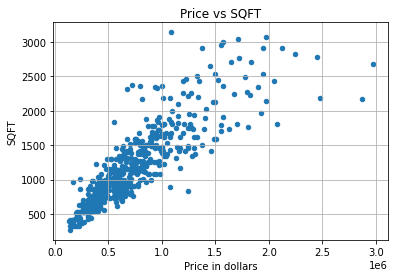

In [ ]:
#plot graph
house_sell_reg.plot(x = 'price', y = 'SQFT', kind = 'scatter')
plt.title("Price vs SQFT")
plt.xlabel('Price in dollars')
plt.ylabel('SQFT')
plt.grid()
plt.show()

In [ ]:
#dependent var and independent var
X = np.array(house_sell_reg['SQFT'].values.reshape(-1,1))
y = np.array(house_sell_reg['price'].values.reshape(-1,1))

In [ ]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [ ]:
#Train and fot model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Intercept
regressor.intercept_

array([-56974.89185996])

In [ ]:
#coef
regressor.coef_

array([[661.91554671]])

In [ ]:
#Predict values
y_pred = regressor.predict(X_test)

In [ ]:
#display actual values and predicted values
house_sell_reg_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
house_sell_reg_pred

,Actual,Predicted
0,1395000.0,1.094758e+06
1,425000.0,3.520889e+05
2,261250.0,2.958261e+05
3,1150000.0,1.333048e+06
4,600000.0,5.288204e+05
...,...,...
110,400000.0,4.248996e+05
111,815000.0,7.492382e+05
112,1000000.0,1.028567e+06
113,2250000.0,1.816246e+06


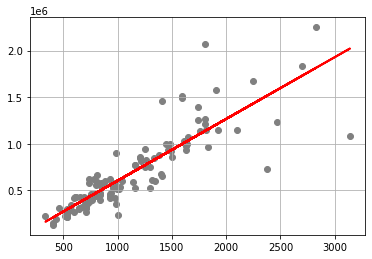

In [ ]:
#plotting of regression line
plt.scatter(X_test, y_test,  color='grey')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.grid()
plt.show()

In [ ]:
#find mean_absolute_error, mean_squared_error, root_ mean_squared_error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 129889.15004347418
Mean Squared Error: 44271345618.54861
Root Mean Squared Error 210407.57025009487


In [ ]:
#find prediction
value = float(input("Enter SQFT of the house:"))
pred = regressor.predict([[value]])
print("Predicition = %.2f" %(pred))

Enter SQFT of the house:995
Predicition = 601631.08
